<a href="https://colab.research.google.com/github/farisazizy/dota2-733e-meta-analysis/blob/main/GG3_DA_GG3DAUP0032_MIDTERM_TEST_FILE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Farishadi Mufakkir Azizy - GG3DAUP0032

# Import Library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import textwrap
import warnings

warnings.filterwarnings('ignore')

# Import Data

In [3]:
df = pd.read_csv('Current_Pro_meta.csv')
df = df.drop(df.columns[0], axis = 1)
df

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
0,Abaddon,all,Melee,150,"Support, Carry, Durable",22,46,108,47.83,False
1,Alchemist,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator, ...",50,102,86,49.02,False
2,Ancient Apparition,int,Ranged,675,"Support, Disabler, Nuker",25,53,84,47.17,False
3,Anti-Mage,agi,Melee,150,"Carry, Escape, Nuker",76,175,636,43.43,False
4,Arc Warden,agi,Ranged,625,"Carry, Escape, Nuker",8,16,74,50.00,False
...,...,...,...,...,...,...,...,...,...,...
119,Windranger,all,Ranged,600,"Carry, Support, Disabler, Escape, Nuker",227,461,887,49.24,False
120,Winter Wyvern,all,Ranged,425,"Support, Disabler, Nuker",29,57,347,50.88,False
121,Witch Doctor,int,Ranged,550,"Support, Nuker, Disabler",38,72,20,52.78,True
122,Wraith King,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator",38,68,24,55.88,True


In [4]:
df['Times Picked'].isnull().any()

False

In [5]:
df.to_csv('Current_Pro_meta_fixed.csv', index=False)

# Create specific table for every hero roles

## proceed to split

In [6]:
# Create a new DataFrame with each row containing one role per hero
roles_df = df.copy()

# If 'Times Picked' and 'Win Rate' are not numeric columns, you might need to convert them to numeric types.
roles_df['Times Picked'] = pd.to_numeric(roles_df['Times Picked'], errors='coerce')
roles_df['Win Rate'] = pd.to_numeric(roles_df['Win Rate'], errors='coerce')

# Split the roles into separate columns
roles_df['Roles'] = roles_df['Roles'].str.split(',')

# Use melt to reshape the DataFrame with one role per row for each hero
roles_df = roles_df.explode('Roles').reset_index(drop=True)

# Strip leading/trailing whitespaces from the roles
roles_df['Roles'] = roles_df['Roles'].str.strip()

# Sort the new DataFrame by 'Name' and 'Roles' to group the roles for each hero together
roles_df.sort_values(['Name', 'Roles'], inplace=True)

# Reset the index again after sorting to have a continuous index without duplicates
roles_df.reset_index(drop=True, inplace=True)

# Print the new table with each hero's roles split into separate rows
roles_df

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
0,Abaddon,all,Melee,150,Carry,22,46,108,47.83,False
1,Abaddon,all,Melee,150,Durable,22,46,108,47.83,False
2,Abaddon,all,Melee,150,Support,22,46,108,47.83,False
3,Alchemist,str,Melee,150,Carry,50,102,86,49.02,False
4,Alchemist,str,Melee,150,Disabler,50,102,86,49.02,False
...,...,...,...,...,...,...,...,...,...,...
476,Wraith King,str,Melee,150,Durable,38,68,24,55.88,True
477,Wraith King,str,Melee,150,Initiator,38,68,24,55.88,True
478,Wraith King,str,Melee,150,Support,38,68,24,55.88,True
479,Zeus,int,Ranged,380,Carry,70,145,232,48.28,False


In [7]:
roles_df.to_csv('roles.csv', index=False)

## Add to CSV per roles

In [8]:
for role, role_group in roles_df.groupby('Roles'):
    role_table = role_group[['Name', 'Roles', 'Total Pro wins', 'Times Picked', 'Times Banned', 'Win Rate', 'Niche Hero?']].copy()
    role_table.reset_index(drop=True, inplace=True)
    role_table.to_csv(f'roles_{role.lower()}.csv', index=False)

# Win Rate Correlation


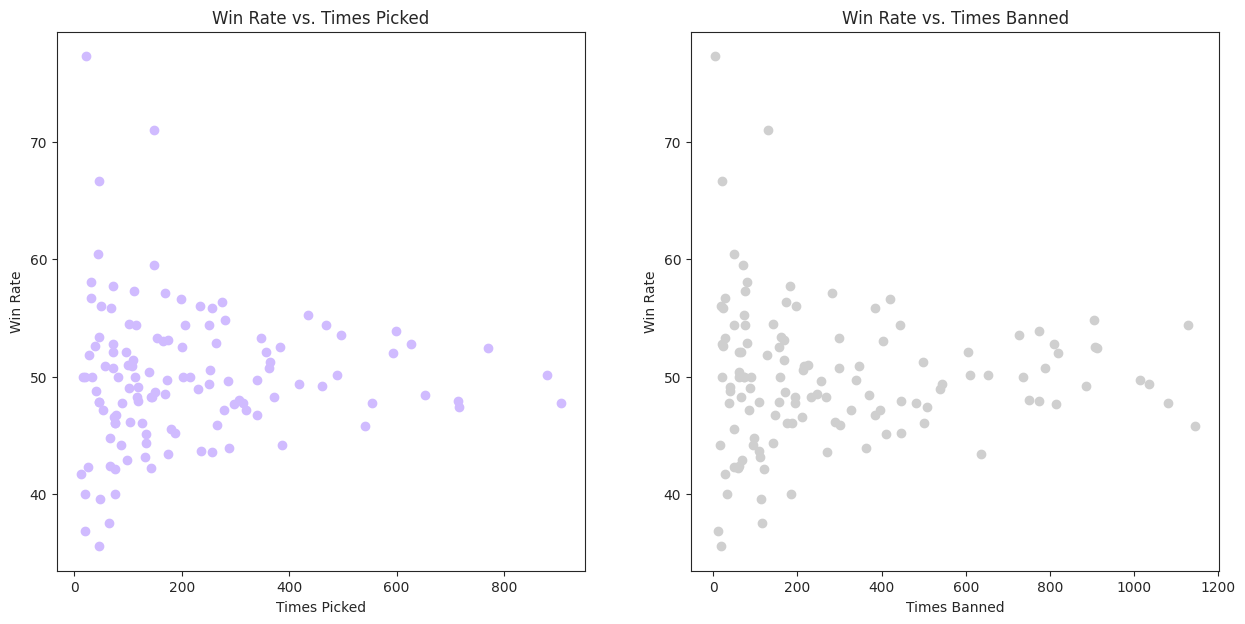

In [11]:
# Set the plot style to 'ticks' and choose pastel colors
sns.set_style('ticks')
colors = sns.color_palette('pastel')

# Create a figure with two subplots side by side (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot a scatter plot in the first subplot (left) for 'Times Picked' vs. 'Win Rate'
ax[0].scatter(data=df, x='Times Picked', y='Win Rate', color=colors[4])
ax[0].set_xlabel('Times Picked')
ax[0].set_ylabel('Win Rate')
ax[0].set_title('Win Rate vs. Times Picked')

# Plot a scatter plot in the second subplot (right) for 'Times Banned' vs. 'Win Rate'
ax[1].scatter(data=df, x='Times Banned', y='Win Rate', color=colors[7])
ax[1].set_xlabel('Times Banned')
ax[1].set_ylabel('Win Rate')
ax[1].set_title('Win Rate vs. Times Banned')

# Show the plots
plt.show()


The analysis suggests that there is a modest correlation between the Win Rate and the "Times Picked" and "Times Banned" features. However, this correlation becomes less reliable for heroes with lower pick rates. In other words, the relationship between Win Rate and pick/ban frequency is more evident for frequently picked heroes, but less so for heroes that are picked less frequently.

# Pick and Ban Analysis

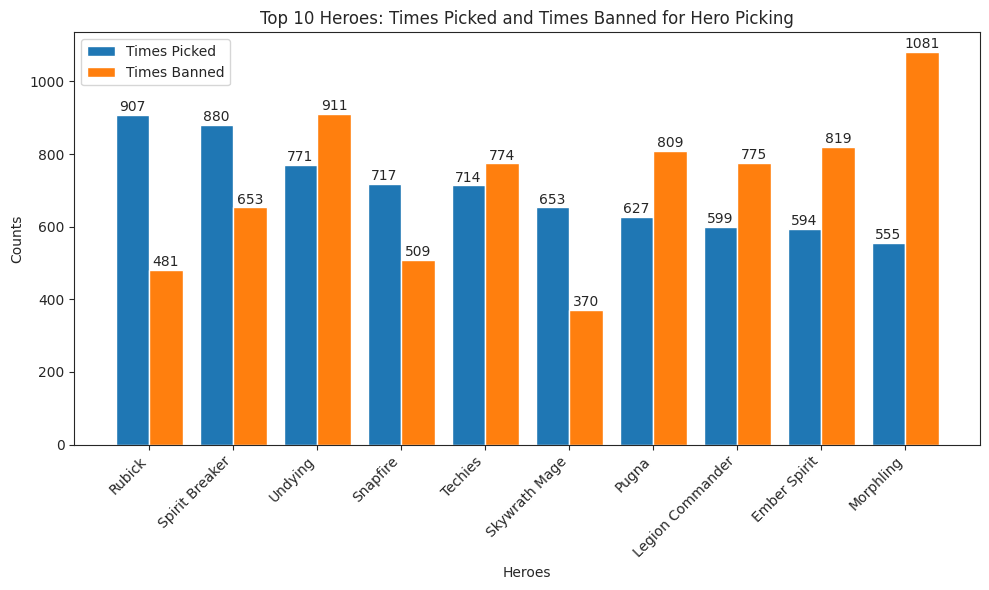

In [15]:
heroes = df['Name']
times_picked = df['Times Picked']
times_banned = df['Times Banned']

# Combine hero names, times picked, and times banned
data = list(zip(heroes, times_picked, times_banned))

# Sort the data based on Times Picked in descending order
data.sort(key=lambda x: x[1], reverse=True)

# Extract the top 10 heroes
top_10_heroes = data[:10]
heroes, times_picked, times_banned = zip(*top_10_heroes)

# Create a bar chart for Times Picked and Times Banned
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
index = range(len(heroes))

bar1 = ax.bar(index, times_picked, bar_width, label='Times Picked')
bar2 = ax.bar([i + bar_width for i in index], times_banned, bar_width, label='Times Banned')

# Add labels with exact numeric values above each bar
for i, v in enumerate(times_picked):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=10)

for i, v in enumerate(times_banned):
    ax.text(i + bar_width, v + 2, str(v), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Heroes')
ax.set_ylabel('Counts')
ax.set_title('Top 10 Heroes: Times Picked and Times Banned for Hero Picking')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(heroes, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

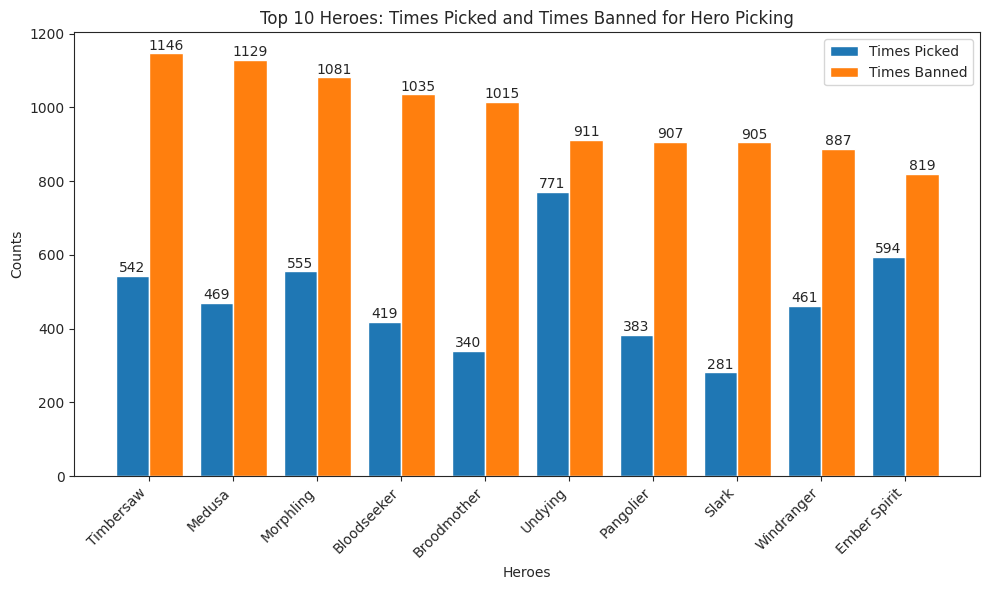

In [16]:
heroes = df['Name']
times_picked = df['Times Picked']
times_banned = df['Times Banned']

# Combine hero names, times picked, and times banned
data = list(zip(heroes, times_picked, times_banned))

# Sort the data based on Times Picked in descending order
data.sort(key=lambda x: x[2], reverse=True)

# Extract the top 10 heroes
top_10_heroes = data[:10]
heroes, times_picked, times_banned = zip(*top_10_heroes)

# Create a bar chart for Times Picked and Times Banned
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
index = range(len(heroes))

bar1 = ax.bar(index, times_picked, bar_width, label='Times Picked')
bar2 = ax.bar([i + bar_width for i in index], times_banned, bar_width, label='Times Banned')

# Add labels with exact numeric values above each bar
for i, v in enumerate(times_picked):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=10)

for i, v in enumerate(times_banned):
    ax.text(i + bar_width, v + 2, str(v), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Heroes')
ax.set_ylabel('Counts')
ax.set_title('Top 10 Heroes: Times Picked and Times Banned for Hero Picking')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(heroes, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

From the two graph above, we can see that top 3 the most picked heroes in the ESL Dreamleague Season 20 is Rubick, Spirit Breaker, and Undying. We might be thinking that those three heroes will be beneficial for their teams to do the strategies that they've been planned in this meta

Besides, we have the most top 3 Banned hero by the teams during ESL Dreamleague Season 20, which is Timbersaw, Medusa, and morphling.

Something interesting to mention is in the Top 10 Picked heroes and top 10 banned heroes, there is the same hero such as: Undying and Morphling. The teams is so desperate to anticipate the pick for those hero and at the same time they wanted to pick the hero.

Timbersaw, Medusa, and as i mentioned before, Morphling, become the most top three banned hero. Perhaps this heroes have a big disanvantage for the match even though they wanted to pick. But it's kind of gambling which you should take a risk the hero will be picked by the enemy.

# Roles Analysis